<a href="https://colab.research.google.com/github/bharaniabhishek123/ML-Introduction/blob/main/03_Get_Started_with_NN_MNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install graphviz

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import graphviz

### In this notebook, we will be building our first Neural Network. Although it's quite faster to impletement using modern deep learning libraries like PyTorch but it's an excellent exercise to build it from scratch using only numby and learn the most about Neural Network internal working.

## Perceptrons 
It's an artificial neuron and takes input of several binary types and produces single binary output. 


It was developed by scientist Frank Rosenblatt and he introduced a rule to calculated the output. He introduced weights, w1,w2,… real numbers expressing the importance of the respective inputs to the output. The neuron's output,
0 or 1, is determined by whether the weighted $\sum_{j} w_j x_j$  is less than or greater than some threshold value. Thresold is a real number.

\begin{align}
        \text{output}(x) = \left\{
        \begin{array}{cl}
        0 &  if & \sum_{j} w_j x_j \le threshold \\
        1 & if  & \sum_{j} w_j x_j > threshold.
        \end{array}
        \right.
    \end{align}





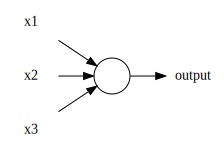

In [ ]:
ps = graphviz.Digraph(name='Basic-Neuron', node_attr={'shape': 'plaintext'})

ps.node('x1')
ps.node('x2')
ps.node('', shape='circle')
ps.edge('x1', '')
ps.edge('x2', '')
ps.edge('x3', '')
ps.edge('', 'output')
ps.graph_attr['rankdir'] = 'LR'
ps

By varying the weights and the threshold, we can get different models of decision-making. A complex network of perceptrons when stacked together forms the Neural Network. 


## We can assume each of these percetrons is a single logictic regression unit and value of whether they are getting activated dependes on weights and threshold value. 

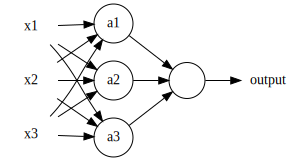

In [ ]:
ps = graphviz.Digraph(name='Basic-NN', node_attr={'shape': 'plaintext'})

ps.node('x1')
ps.node('x2')
ps.node('x3')
ps.node('a1', shape='circle')
ps.node('a2', shape='circle')
ps.node('a3', shape='circle')
ps.node('', shape='circle')
ps.edge('x1', 'a1')
ps.edge('x1', 'a2')
ps.edge('x1', 'a3')
ps.edge('x2', 'a2')
ps.edge('x2', 'a1')
ps.edge('x2', 'a3')
ps.edge('x3', 'a3')
ps.edge('x3', 'a1')
ps.edge('x3', 'a2')
ps.edge('a1', '')
ps.edge('a2', '')
ps.edge('a3', '')
ps.edge('', 'output')
ps.graph_attr['rankdir'] = 'LR'
ps.graph_attr['size'] = '22.5'
ps

In this network, the first column of perceptrons - what we'll call the first layer of perceptrons - is making three very simple decisions, by weighing the input evidence. In the second layer, Each of those perceptrons is making a decision by weighing up the results from the first layer of decision-making. In this way a perceptron in the second layer can make a decision at a more complex and more abstract level than perceptrons in the first layer. And even more complex decisions can be made by the perceptron in the third layer. In this way, a many-layer network of perceptrons can engage in sophisticated decision making.

## Simplifying the way we write perceptron equation :

\begin{align}
        \text{output}(x) = \left\{
        \begin{array}{cl}
        0 &  if & \sum_{j} w_j x_j \le threshold \\
        1 & if  & \sum_{j} w_j x_j > threshold.
        \end{array}
        \right.
    \end{align}

1. $\sum_{j} w_j x_j$ is a dot product between vector w and x, can be written as w . x
2. The second change is to move the threshold to the other side of the inequality, and to replace it by what's known as the perceptron's bias, b ≡−threshold. Using the bias instead of the threshold, the perceptron rule can be rewritten:

\begin{align}
        \text{output}(x) = \left\{
        \begin{array}{cl}
        0 &  if & w . x + b \le 0 \\
        1 & if  & w . x  + b > 0.
        \end{array}
        \right.
    \end{align}

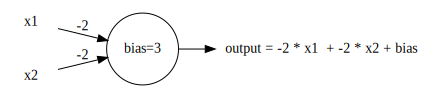

In [ ]:
ps = graphviz.Digraph(name='Basic-NAND', node_attr={'shape': 'plaintext'})

ps.node('x1')
ps.node('x2')
ps.node('3','bias=3', shape='circle')
ps.edge('x1', '3', '-2')
ps.edge('x2', '3', '-2')
ps.edge('3', 'output = -2 * x1  + -2 * x2 + bias')
ps.graph_attr['rankdir'] = 'LR'
ps

x1 x2  |  | output
-------------------|--------------------|-------
0, 0       | (−2)∗0+(−2)∗0+3=3 | 1
1, 1       | (−2)∗1+(−2)∗1+3=-1| 0
1, 0       | (−2)∗1+(−2)∗0+3=1 | 1
0, 1       | (−2)∗0+(−2)∗1+3=1 | 1

## And so our perceptron implements a NAND gate! In fact, we can use networks of perceptrons to compute any logical function at all. The reason is that the NAND gate is universal for computation, that is, we can build any computation up out of NAND gates like AND, NOT , OR.

# Sigmoid neurons

In our example, the inputs to the network is the raw pixel data from a scanned, handwritten image of a digit. And we'd like the network to learn weights and biases so that the output from the network correctly classifies the digit. To see how learning might work, suppose we make a small change in some weight (or bias) in the network. What we'd like is for this small change in weight to cause only a small corresponding change in the output from the network. As we'll see in a moment, this property will make learning possible. Schematically, here's what we want (obviously this network is too simple to do handwriting recognition!)


If it were true that a small change in a weight (or bias) causes only a small change in output, then we could use this fact to modify the weights and biases to get our network to behave more in the manner we want. For example, suppose the network was mistakenly classifying an image as an "8" when it should be a "9". We could figure out how to make a small change in the weights and biases so the network gets a little closer to classifying the image as a "9". And then we'd repeat this, changing the weights and biases over and over to produce better and better output. The network would be learning.

The problem is that this isn't what happens when our network contains perceptrons. In fact, a small change in the weights or bias of any single perceptron in the network can sometimes cause the output of that perceptron to completely flip, say from 0 to 1.


We can overcome this problem by introducing a new type of artificial neuron called a sigmoid neuron. Sigmoid neurons are similar to perceptrons, but modified so that small changes in their weights and bias cause only a small change in their output. That's the crucial fact which will allow a network of sigmoid neurons to learn.





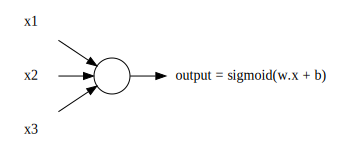

In [ ]:
ps = graphviz.Digraph(name='Basic-Sigmoid', node_attr={'shape': 'plaintext'})

ps.node('x1')
ps.node('x2')
ps.node('', shape='circle')
ps.edge('x1', '')
ps.edge('x2', '')
ps.edge('x3', '')
ps.edge('', 'output = sigmoid(w.x + b)')
ps.graph_attr['rankdir'] = 'LR'
ps

Assume $z = w.x + b $ 

where $\sigma$ is called the sigmoid function
$\sigma(z) = \frac{1}{1+e^{-z}}$
To put it all a little more explicitly, the output of a sigmoid neuron with inputs x1,x2,…, weights w1,w2,…, and bias b

$\sigma(z) = \frac{1}{1+exp({-\sum_j w_j x_j - b})}$


When $z= w.x + b$ is large and positive, $e^{-z} \approx 0$ , then $\sigma(z) \approx 1$

When $z= w.x + b$ is large and negative, $e^{-z} \approx \inf $ , then $\sigma(z) \approx 0$

It's only when $z= w.x + b$ is of modest size that there's much deviation from the perceptron model. 



The sigmoid functions in general is also called as non-linear activation function. These non-linear activations helps Neural Network learn complex functions.

Without	non-linearities,	neural	networks	can’t	do	anything	more	than	a	linear	transform which we discussed earlier in the workshop.



With	more	layers,	they	can	approximate	more	complex	functions and hence the term Deep Learning.

## Let's build Neural Network for the problem.

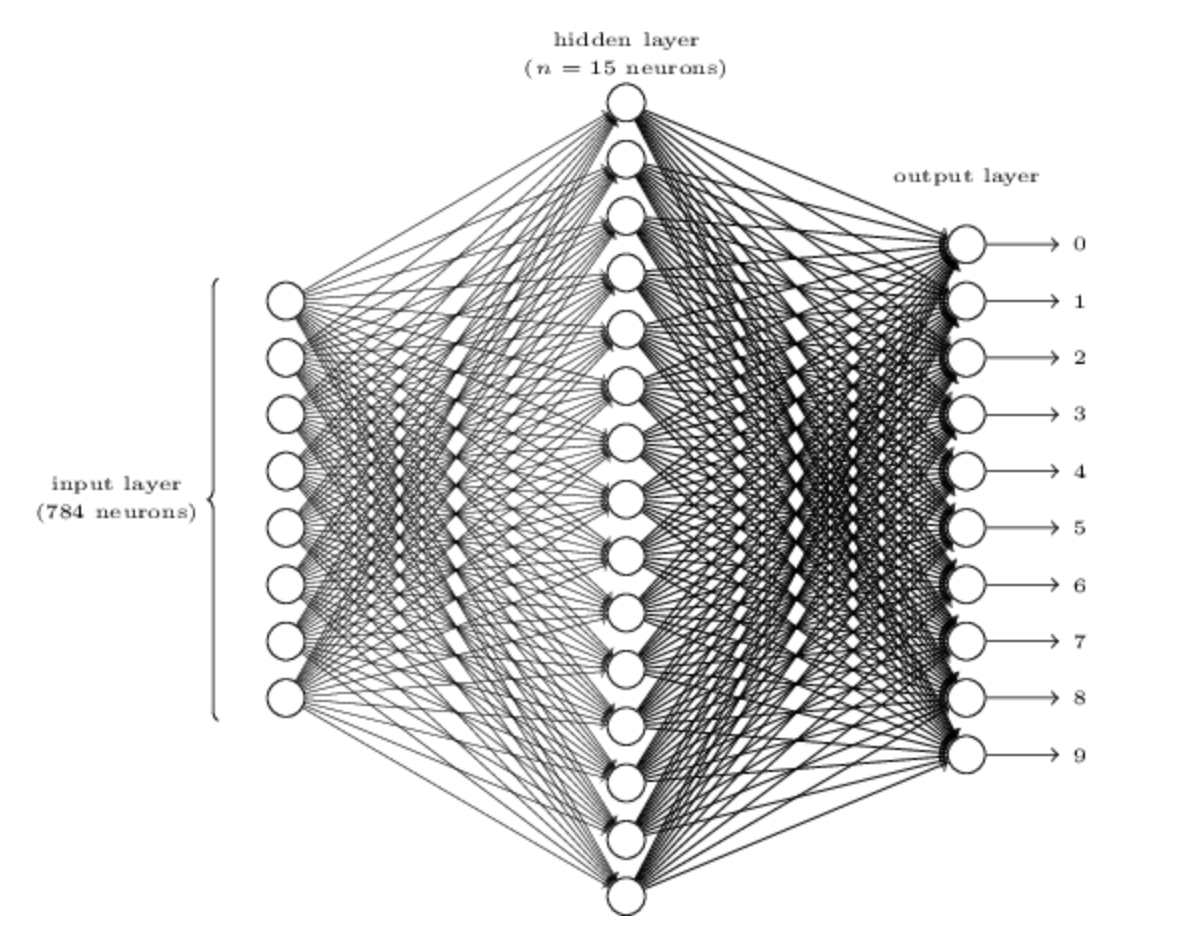

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/ML-Introduction/images/MLP_MNIST.png")

To recognize the digits we will be using a 3 layer neural network. 

## Input layer : image of size 28 x 28 pixels, scanned handwritten digits. So, input layer contains 28 x 28 = 784 neurons. The image is a greyscale image with a value of 0.0 representing white, a value of 1.0 representing black, and in between values representing gradually darkening shades of grey. 


## hidden layer : second layer of the network is a hidden layer. We denote the number of neurons in this hidden layer by n and we'll experiment with different values for n. The example shown illustrates a small hidden layer, containing just n=15 neurons.

## output layer  : The output layer of the network contains 10 neurons. If the first neuron fires, i.e., has an output ≈1, then that will indicate that the network thinks the digit is a 0.


To build an train above neural network, we will do implement following steps for a this task : 

We will implement the following steps - 

1.   Download the MNIST dataset and make it ready for consumption.
2.   Define the model
3.   Optimize the model by define the loss function and optimizer
4.   Train the model on the training data and calculate Test Accuracy
5.   Visualize the results.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
import torch.nn.functional as F
import torch.optim as optim

# 1. Download the MNIST Dataset 


In [ ]:
transform = transforms.ToTensor()

mean = 0.1307
std = 0.3081
batch_size = 64
transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(mean,), std=(std,))
    ])


## load mnist dataset

train_set = datasets.MNIST('mnist_data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('mnist_data', train=False, download=True, transform=transform)

## Create dataloaders to interate over dataset , shuffle is true to make sure we pick random images in each batch. 

train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


##1.1 Visualize the dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Single batch input shape:  torch.Size([64, 1, 28, 28])
Single batch label shape:  torch.Size([64])
Labels:  tensor([7, 7, 5, 2, 9, 3, 0, 6, 2, 0, 2, 2, 1, 4, 4, 2, 7, 2, 8, 9, 8, 9, 1, 4,
        6, 3, 2, 5, 8, 1, 2, 1, 9, 9, 3, 9, 1, 5, 6, 9, 6, 4, 3, 8, 9, 5, 6, 8,
        3, 4, 2, 4, 8, 2, 7, 6, 9, 3, 0, 7, 3, 2, 8, 8])


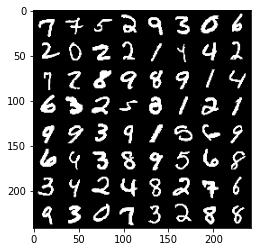

In [ ]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print('Single batch input shape: ', images.size())
print('Single batch label shape: ', labels.size())
print('Labels: ', labels)

show_batch(images)


### Input X shape  and label y shape ; the image is grayscale so contains only one channel

In [ ]:
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


When we feed it to Neural Network model, we will be doing a flattening operation to convert 28x28 pixel image data into flat array of 784 pixel values.

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(images)
print(flat_image.size()) # Batch Size, Input Features

torch.Size([64, 784])


# 2. Define the Model 

torch.nn contains all the necessary building blocks to create neural networks, our model will be subclass of nn.Module.

Note : Input tensor shape is (BACTH_SIZE, N_CHANNELS, WIDTH, HEIGHT). To feed our MLP network, we need to flatten the three last dimensions. We can do so with tensor.view().



In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_activation_layers = nn.Sequential(
        nn.Linear(28*28, 15),
        nn.ReLU(),
        nn.Linear(15, 10),
        nn.ReLU()
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_activation_layers(x)
    return logits 


## We can create one more model which is much more deeper than above.

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

In [ ]:
hidden_sizes = [128, 64] 
output_size = 10

class NeuralNetwork_Best(nn.Module):
  def __init__(self):
    super(NeuralNetwork_Best, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_activation_layers = nn.Sequential(
        nn.Linear(28*28, hidden_sizes[0]),
        nn.ReLU(),
        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
        nn.ReLU(),
        nn.Linear(hidden_sizes[1], output_size),
        nn.LogSoftmax(dim=1)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_activation_layers(x)
    return logits 

In [ ]:
# if cuda is available 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# model
model = NeuralNetwork_Best().to(device)

### Print the structure of the model

In [ ]:
print(model)

NeuralNetwork_Best(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_activation_layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): LogSoftmax(dim=1)
  )
)


Softmax function : The last linear layer of the neural network returns logits which are raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model's predicted densities for each class. dim parameter indicates the dimension along which the values must sum to 1.

# 3. Define loss function and optimizer to optimize the model.

## 3.1 Intialize the hyperparameters 

In [ ]:
learning_rate = 1e-3
batch_size = 64 

## 3.2 Define loss function and optimization 

In [ ]:
# Define the loss function
# loss_function = nn.CrossEntropyLoss()
loss_function = nn.NLLLoss()
# Define the optimizer, learning rate 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_function, optimizer, info_per_batch):
    size = len(dataloader.dataset)

    batch_losses = []
    batch_accuracies = []
    number_of_batches = len(dataloader)

    for batch, (X, y) in enumerate(dataloader):        

        X, y = X.to(device), y.to(device)
        # Compute prediction and loss
        pred = model(X) # Forward propogation, Do no call model.forward() directly 
        loss = loss_function(pred, y)
        
        # Backpropagation 
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()

        batch_prediction = pred.max(dim=1, keepdim=True)[1]
        batch_correct = batch_prediction.eq(y.view_as(batch_prediction)).sum().item()
        batch_size = len(X)
        batch_accuracy = batch_correct / batch_size
        batch_accuracies.append(batch_accuracy)
        batch_loss = loss.item()
        batch_losses.append(batch_loss)

        if (batch+1) % info_per_batch == 0:
            loss, current = loss.item(), batch * len(X)
            # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            info = 'Train: Batch {current_batch}/{number_of_batches}, Loss: {batch_loss:.5f}, Accuracy: % {batch_accuracy:.2f}'
            print(info.format(current_batch=(batch + 1), number_of_batches=number_of_batches,
                              batch_loss=batch_loss, batch_accuracy=(100 * batch_accuracy)))

    average_loss = sum(batch_losses) / number_of_batches
    accuracy = sum(batch_accuracies) / number_of_batches
    return average_loss, accuracy


def test_loop(dataloader, model, loss_function):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

# 4. Train the Model

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

number_of_epochs = 20
epochs = np.arange(start=1, stop=(number_of_epochs + 1), step=1, dtype=int)


train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in epochs:

    info = 'Epoch {epoch_index}/{number_of_epochs}'
    print(info.format(epoch_index=epoch, number_of_epochs=number_of_epochs))

    train_loss, train_accuracy = train_loop(train_loader, model, loss_function, optimizer, info_per_batch=100)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_loss, test_accuracy = test_loop(test_loader, model, loss_function)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

print("Done!")

Epoch 1/20
Train: Batch 100/938, Loss: 2.28383, Accuracy: % 6.25
Train: Batch 200/938, Loss: 2.24579, Accuracy: % 18.75
Train: Batch 300/938, Loss: 2.21380, Accuracy: % 25.00
Train: Batch 400/938, Loss: 2.19448, Accuracy: % 34.38
Train: Batch 500/938, Loss: 2.15177, Accuracy: % 37.50
Train: Batch 600/938, Loss: 2.15142, Accuracy: % 43.75
Train: Batch 700/938, Loss: 2.06743, Accuracy: % 48.44
Train: Batch 800/938, Loss: 2.05367, Accuracy: % 48.44
Train: Batch 900/938, Loss: 1.96009, Accuracy: % 48.44
Test Error: 
 Accuracy: 48.2%, Avg loss: 0.031012 

Epoch 2/20
Train: Batch 100/938, Loss: 1.92556, Accuracy: % 43.75
Train: Batch 200/938, Loss: 1.91072, Accuracy: % 43.75
Train: Batch 300/938, Loss: 1.79543, Accuracy: % 56.25
Train: Batch 400/938, Loss: 1.76301, Accuracy: % 59.38
Train: Batch 500/938, Loss: 1.68081, Accuracy: % 60.94
Train: Batch 600/938, Loss: 1.61127, Accuracy: % 71.88
Train: Batch 700/938, Loss: 1.57157, Accuracy: % 65.62
Train: Batch 800/938, Loss: 1.48634, Accuracy: 

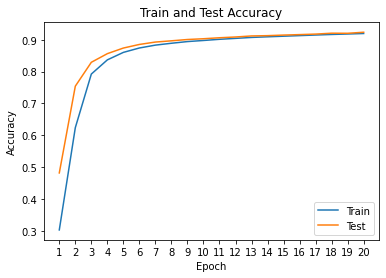

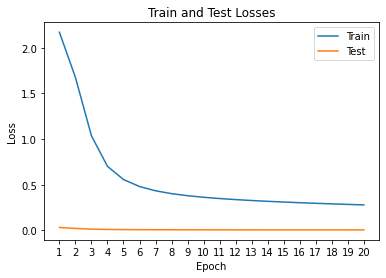

In [ ]:
def plot_graph(x, y, x_label, y_label, title):
    plt.clf()
    plt.xticks(x)
    plt.plot(x, y)
    plt.xlabel(xlabel=x_label)
    plt.ylabel(ylabel=y_label)
    plt.title(label=title)
    plt.show()


def plot_multi_graph(lines, x_label, y_label, title):
    plt.clf()
    labels = []
    for line in lines:
        label = line['label']
        labels.append(label)
        x = line['data']['x']
        y = line['data']['y']
        plt.xticks(x)
        plt.plot(x, y)
    plt.xlabel(xlabel=x_label)
    plt.ylabel(ylabel=y_label)
    plt.title(label=title)
    plt.legend(labels)
    plt.show()

plot_multi_graph(
        lines=[
            dict(label='Train', data=dict(x=epochs, y=train_accuracies)),
            dict(label='Test', data=dict(x=epochs, y=test_accuracies))
        ],
        x_label='Epoch', y_label='Accuracy',
        title='Train and Test Accuracy')

plot_multi_graph(
        lines=[
            dict(label='Train', data=dict(x=epochs, y=train_losses)),
            dict(label='Test', data=dict(x=epochs, y=test_losses))
        ],
        x_label='Epoch', y_label='Loss',
        title='Train and Test Losses')

# plot_graph(x=epochs, y=train_losses,
#                     x_label='Epoch', y_label='Loss',
#                     title='Train Loss Plot'
#                     )

# plot_graph(x=epochs, y=test_losses,
#                     x_label='Epoch', y_label='Loss',
#                     title='Test Loss Plot'
#                     )


## 5. Visualize the test results 

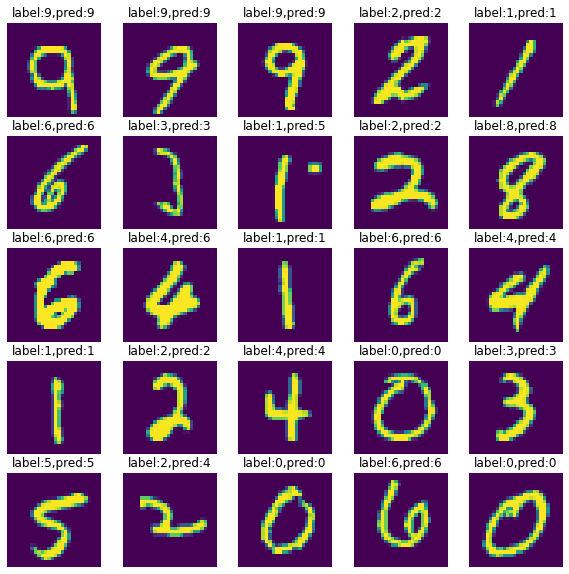

In [ ]:
sample_test_iter = iter(test_loader)
sample_test_images, sample_test_labels = sample_test_iter.next() 

sample_test_images, sample_test_labels = sample_test_images.to(device), sample_test_labels.to(device)
sample_test_preds_logits = model(sample_test_images)
sample_test_preds = sample_test_preds_logits.argmax(1)


def unison_shuffled_copies(a, b, c):
    assert len(a) == len(b) == len(c)
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p]

images, labels, preds = unison_shuffled_copies(sample_test_images, sample_test_labels, sample_test_preds)

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
flatted_axs = [item for one_ax in axs for item in one_ax]
for ax, img, label, pred in zip(flatted_axs, images[:25], labels[:25], preds[:25]):
  if device == 'cpu':
        ax.imshow(np.reshape(img, (28,28)))
  else:
        ax.imshow(np.reshape(img.unsqueeze(0).cuda().cpu(), (28,28)))
  ax.set_title('label:{},pred:{}'.format(label, pred))
  ax.axis('off')
plt.show()  


## Model Parameters

As each layer of the model contains weights and biases that are optimized on training data. We can access all the model parameters by calling model.named_parameters method

In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork_Best(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_activation_layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): LogSoftmax(dim=1)
  )
) 


Layer: linear_activation_layers.0.weight | Size: torch.Size([128, 784]) | Values : tensor([[-0.0347,  0.0125,  0.0086,  ...,  0.0308,  0.0119, -0.0121],
        [ 0.0268,  0.0307,  0.0336,  ..., -0.0043, -0.0244, -0.0287]],
       grad_fn=<SliceBackward>) 

Layer: linear_activation_layers.0.bias | Size: torch.Size([128]) | Values : tensor([-0.0231,  0.0388], grad_fn=<SliceBackward>) 

Layer: linear_activation_layers.2.weight | Size: torch.Size([64, 128]) | Values : tensor([[ 0.0685,  0.0718,  0.0451,  0.0167, -0.0590,  0.0297, -0.0652,  0.0722,
         -0.0577,  0.0477, -0.0384,  0.0377, -0.0530, -0.0379, -0.0630, 

In [ ]:
# torch.save(MLP_model.state_dict(), 'drive/MyDrive/ML-Introduction/mnist_checkpoint.pth')

## Improving the Neural Network Test Accuracy

We will discuss few techniques to improve the test accuracies of the model. Continue experimenting with :

1. Regularization

2. Dropout 

3. Create more training data by rotating the images.